<a href="https://colab.research.google.com/github/FGalvao77/Criando-uma-RNA-simples-com-Keras-para-regressao/blob/main/Criando_uma_RNA_simples_com_Keras_para_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Criando uma RNA simples com Keras para regressão**
---
---

In [1]:
!curl https://didatica.tech/wp-content/uploads/2023/02/admission_dataset.csv >> admission.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12322  100 12322    0     0   185k      0 --:--:-- --:--:-- --:--:--  188k


In [2]:
!head admission.csv

GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit 
315,105,3,2.0,2.5,8.48,0,0.75
321,112,5,5.0,5.0,9.06,1,0.86
327,103,3,4.0,4.0,8.3,1,0.74
305,112,3,3.0,3.5,8.65,0,0.71
297,96,2,2.5,1.5,7.89,0,0.43
321,109,3,3.0,4.0,8.2,1,0.75
298,99,1,1.5,3.0,7.46,0,0.53
312,109,3,3.0,3.0,8.69,0,0.77
320,108,3,3.5,4.0,8.44,1,0.76


In [3]:
import keras

print(f'VERSION: {keras.__version__}')

VERSION: 2.11.0


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(
    filepath_or_buffer='admission.csv'
)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43


In [7]:
X  = df.drop(columns='Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [8]:
X_train, X_val = X[0:300], X[300:]
y_train, y_val = y[0:300], y[300:]

In [9]:
X_train.shape

(300, 7)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=7))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [14]:
history = model.fit(
    x=X_train, y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val)
)

Epoch 1/100
10/10 [==============================] - 3s 96ms/step - loss: 0.5390 - mae: 0.7197 - val_loss: 0.5303 - val_mae: 0.7158
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5248 - mae: 0.7097 - val_loss: 0.5161 - val_mae: 0.7058
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5107 - mae: 0.6997 - val_loss: 0.5022 - val_mae: 0.6959
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4969 - mae: 0.6899 - val_loss: 0.4886 - val_mae: 0.6861
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4835 - mae: 0.6800 - val_loss: 0.4752 - val_mae: 0.6762
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.4702 - mae: 0.6702 - val_loss: 0.4621 - val_mae: 0.6665
Epoch 7/100
10/10 [==============================] - 0s 29ms/step - loss: 0.4574 - mae: 0.6605 - val_loss: 0.4493 - val_mae: 0.6568
Epoch 8/100
10/10 [==============================] - 0s 18ms/step - loss: 0.

In [15]:
# importando "libs" para visualização gráfica e para ajustes de parâmetros e etc
import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline
# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 5

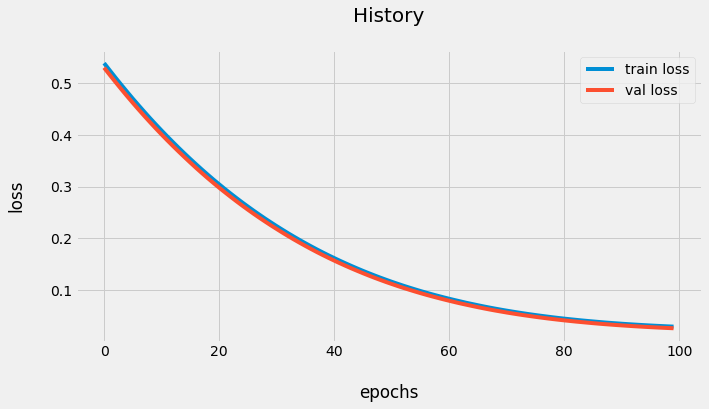

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('History\n', size=20)
plt.xlabel('\nepochs')
plt.ylabel('loss\n')
plt.legend(['train loss', 'val loss'])
plt.show()